<a href="https://colab.research.google.com/github/Kurt9806/Seismic-analysis/blob/main/Metodos_Numericos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduccion a Python

In [ ]:
if 2>3:
  print("2 es mayor a 3")
else:
  print("3 es mayor a 2")


3 es mayor a 2


In [ ]:
import math

In [ ]:
math.pi

3.141592653589793

In [ ]:
math.e

2.718281828459045

In [ ]:
math.e**4

54.59815003314423

# Clase de Metodos numericos

## Metodo de Aproximacion de Carga

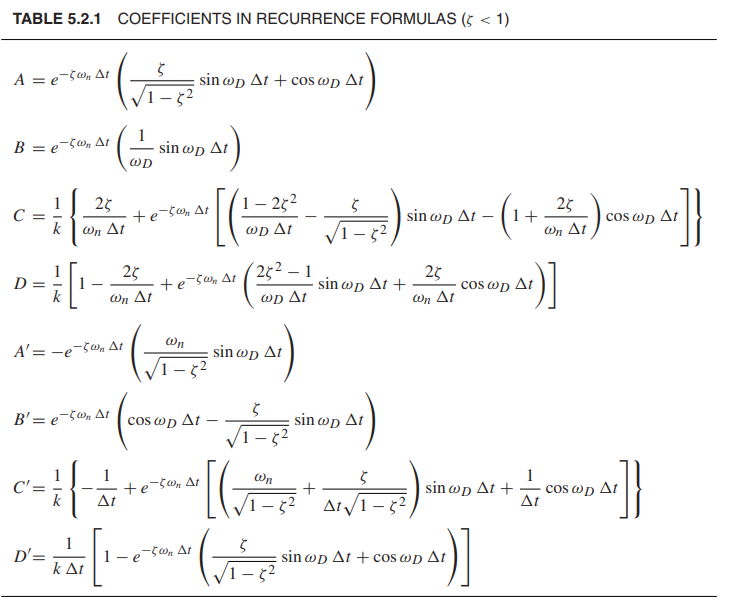

In [ ]:
# Initial conditions
m = 10
k = 160
xi = 0.02

wn = math.sqrt(k/m)
wd = wn*math.sqrt(1-xi**2)

dt = 0.01

In [ ]:
# Calcular los coeficientes
e = math.e**(-xi*wn*dt)

A = e*(xi/math.sqrt(1-xi**2)*math.sin(wd*dt)+math.cos(wd*dt))
B = e*(1/wd*math.sin(wd*dt))
C = 1/k*(2*xi/(wn*dt)+e*(((1-2*xi**2)/(wd*dt)-xi/(math.sqrt(1-xi**2)))*math.sin(wd*dt)-(1+2*xi/(wn*dt))*math.cos(wd*dt)))
D = 1/k*(1-2*xi/(wn*dt)+e*((2*xi**2-1)/(wd*dt)*math.sin(wd*dt)+2*xi/(wn*dt)*math.cos(wd*dt)))
A_ = -e*(wn/math.sqrt(1-xi**2)*math.sin(wd*dt))
B_ = e*(math.cos(wd*dt)-xi/math.sqrt(1-xi**2)*math.sin(wd*dt))
C_ = 1/k*(-1/dt+e*((wn/math.sqrt(1-xi**2)+xi/(dt*math.sqrt(1-xi**2)))*math.sin(wd*dt)+1/dt*math.cos(wd*dt)))
D_ = 1/(k*dt)*(1-e*(xi/math.sqrt(1-xi**2)*math.sin(wd*dt)+math.cos(wd*dt)))

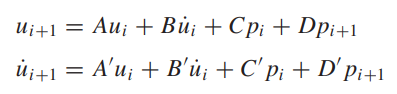

In [ ]:
import numpy as np

# Definiendo la fuerza
P = [10*math.cos(10.5*t) for t in np.arange(0,3,0.01)]
T = np.arange(0,3,dt)

u = np.zeros(len(T))
u_ = np.zeros(len(T))

for i in range(len(T)-1):
  u[i+1] = A*u[i] + B*u_[i] + C*P[i] + D*P[i+1]
  u_[i+1] = A_*u[i] + B_*u_[i] + C_*P[i] + D_*P[i+1]


In [ ]:
# Utilizando la biblioteca Pandas
import pandas as pd

Table1 = {'Tiempo':T, 'Fuerza':P, 'Desplazamiento':u, 'Velocidad':u_}
df1 = pd.DataFrame.from_dict(Table1)
print(df1)
print(len(T))

df1.to_excel('Desplazamiento1.xls')

     Tiempo     Fuerza  Desplazamiento  Velocidad
0      0.00  10.000000        0.000000   0.000000
1      0.01   9.944926        0.000050   0.009962
2      0.02   9.780309        0.000199   0.019782
3      0.03   9.507964        0.000445   0.029337
4      0.04   9.130889        0.000784   0.038505
..      ...        ...             ...        ...
295    2.95   9.043566       -0.003492  -0.023562
296    2.96   9.441053       -0.003679  -0.013715
297    2.97   9.734547       -0.003765  -0.003516
298    2.98   9.920817       -0.003749   0.006911
299    2.99   9.997810       -0.003627   0.017443

[300 rows x 4 columns]
300


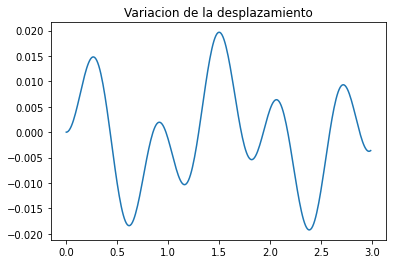

In [ ]:
import matplotlib.pyplot as plt

plt.title('Variacion de la desplazamiento')
#plt.plot(T,P)
plt.plot(T,u)

# Metodo de Diferencias Centrales
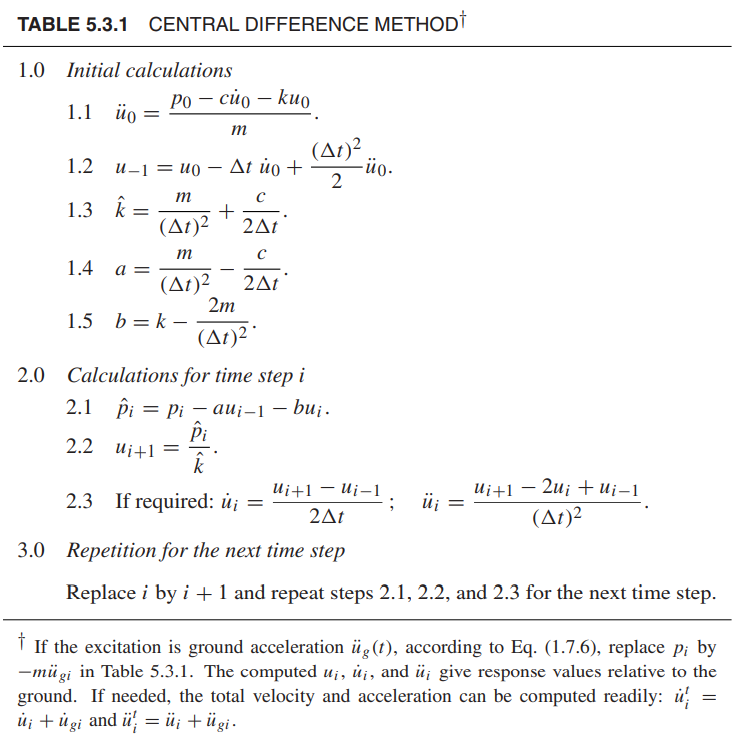

In [ ]:
# Initial parameters
m = 10
k = 160
xi = 0.02

wn = math.sqrt(k/m)
wd = wn*math.sqrt(1-xi**2)
ccr = 2*m*wn
c = ccr*xi

dt = 0.01
T = np.arange(0,3,dt)
P = [10*math.cos(10.5*t) for t in np.arange(0,3,dt)]

In [ ]:
# Initial calculations

## Suponiendo que los valores iniciales son: u0=0, v0=0, a0=0
u =np.zeros(len(T))
u_ = np.zeros(len(T))
u__ = np.zeros(len(T))
u_1 = np.zeros(len(T))

u__[0]=(P[0]-c*u_[0]-k*u[0])/m
u_1[0] = u[0]-dt*u_[0]+dt**2/2*u__[0]
k_ = m/(dt**2)+c/(2*dt)
a = m/(dt**2)-c/(2*dt)
b = k - 2*m/(dt**2)

In [ ]:
# Iteracion

P_ = np.zeros(len(T))

for i in range(len(T)-1):
  P_[i] = P[i]-a*u_1[i]-b*u[i]
  u[i+1] = P_[i]/k_
  u_1[i+1] = u[i]

In [ ]:
Table2 = {'Tiempo':T, 'Fuerza':P, 'P_hat':P_, 'U-1':u_1, 'Desplazamiento':u}
df2 = pd.DataFrame.from_dict(Table2)
print(df2)

     Tiempo     Fuerza       P_hat       U-1  Desplazamiento
0      0.00  10.000000    5.004000  0.000050        0.000000
1      0.01   9.944926   19.936926  0.000000        0.000050
2      0.02   9.780309   44.594413  0.000050        0.000199
3      0.03   9.507964   78.649150  0.000199        0.000446
4      0.04   9.130889  121.654594  0.000446        0.000786
..      ...        ...         ...       ...             ...
295    2.95   9.043566 -368.560601 -0.003212       -0.003495
296    2.96   9.441053 -377.242999 -0.003495       -0.003683
297    2.97   9.734547 -375.573862 -0.003683       -0.003769
298    2.98   9.920817 -363.386139 -0.003769       -0.003753
299    2.99   9.997810    0.000000 -0.003753       -0.003631

[300 rows x 5 columns]


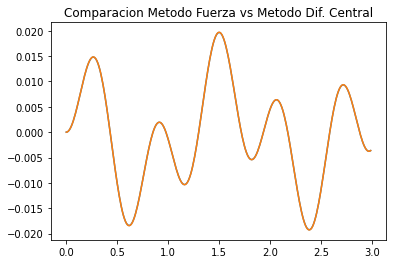

In [ ]:
# Comparando metodos
plt.title('Comparacion Metodo Fuerza vs Metodo Dif. Central')
plt.plot(df1['Tiempo'],df1['Desplazamiento'])
plt.plot(df2['Tiempo'],df2['Desplazamiento'])

# Newmark

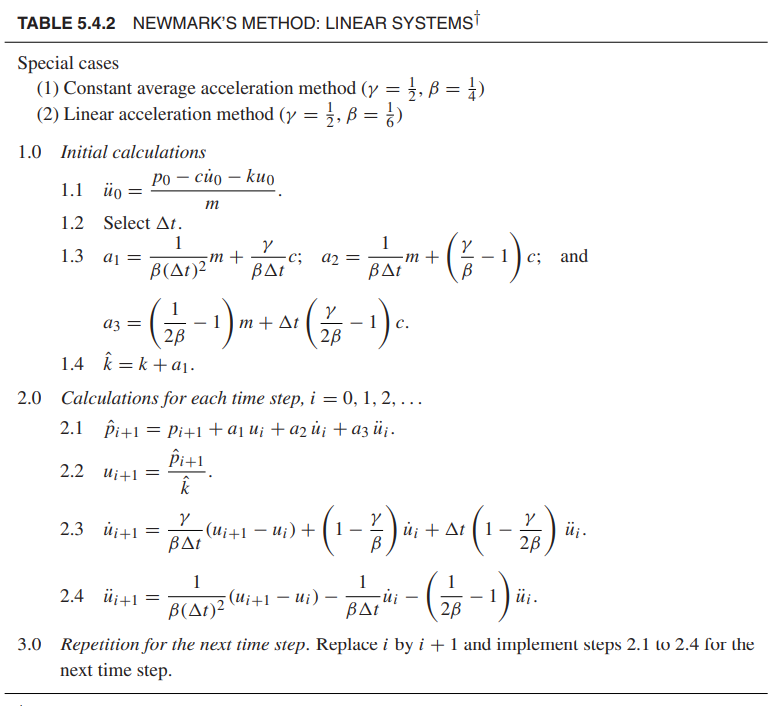

In [ ]:
# Initial conditions
Metodo = {"constante":{'beta':1/4,'gamma':1/2},"lineal":{'beta':1/6,'gamma':1/2}}
Tipo_newmark='lineal'

beta= Metodo[Tipo_newmark]['beta']
gamma = Metodo[Tipo_newmark]['gamma']

m = 10
k = 160
xi = 0.02

wn = math.sqrt(k/m)
wd = wn*math.sqrt(1-xi**2)
ccr = 2*m*wn
c = ccr*xi

dt = 0.01
T = np.arange(0,3,dt)
P = [10*math.cos(10.5*t) for t in np.arange(0,3,dt)]

In [ ]:
# Initial calculations
u =np.zeros(len(T))
u_ = np.zeros(len(T))
u__ = np.zeros(len(T))

u__[0]=(P[0]-c*u_[0]-k*u[0])/m
a1 = 1/(beta*dt**2)*m+gamma/(beta*dt)*c
a2 = 1/(beta*dt)*m+(gamma/beta-1)*c
a3 = (1/(2*beta)-1)*m+dt*(gamma/(2*beta)-1)*c
k_ = k+a1

In [ ]:
P_ = np.zeros(len(T))

for i in range(len(T)-1):
  P_[i+1]=P[i+1]+a1*u[i]+a2*u_[i]+a3*u__[i]
  u[i+1] = P_[i+1]/k_
  u_[i+1] = gamma/(beta*dt)*(u[i+1]-u[i])+(1-gamma/beta)*u_[i]+dt*(1-gamma/(2*beta))*u__[i]
  u__[i+1] = 1/(beta*dt**2)*(u[i+1]-u[i])-1/(beta*dt)*u_[i]-(1/(2*beta)-1)*u__[i]

In [ ]:
Table3 = {'Tiempo':T, 'Fuerza':P, 'Deplazamiento':u}
df3 = pd.DataFrame.from_dict(Table3)
print(df3)

     Tiempo     Fuerza  Deplazamiento
0      0.00  10.000000       0.000000
1      0.01   9.944926       0.000050
2      0.02   9.780309       0.000199
3      0.03   9.507964       0.000445
4      0.04   9.130889       0.000784
..      ...        ...            ...
295    2.95   9.043566      -0.003496
296    2.96   9.441053      -0.003683
297    2.97   9.734547      -0.003769
298    2.98   9.920817      -0.003752
299    2.99   9.997810      -0.003630

[300 rows x 3 columns]


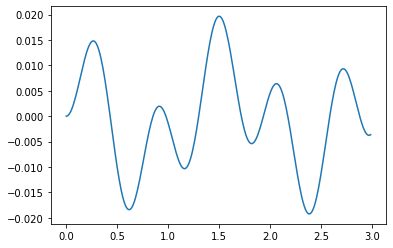

In [ ]:
plt.plot(df3['Tiempo'],df3['Deplazamiento'])